In [1]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import theano
import theano.tensor as tt
from theano.tensor import fft

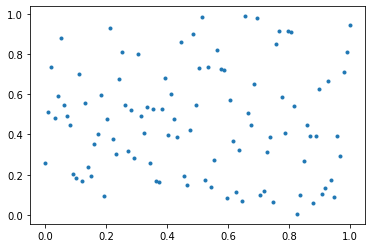

In [39]:
x=np.linspace(0,1,100)
x=np.reshape(x,(1,len(x)))
y=np.random.rand(100)
plt.plot(x[0,:],y,'.')

In [46]:
import numpy as np
import theano
import theano.tensor as T
from theano.tensor import fft

theano.config.compute_test_value='off'
z = tt.matrix('z', dtype='float64')

rfft = fft.rfft(z, norm='ortho')
f_rfft = theano.function([z], rfft)


irfft = fft.irfft(z, norm='ortho')
f_irfft = theano.function([z], irfft)

TypeError: IRFFTOp: input must have dimension >= 3,  with first dimension batches and last real/imag parts

In [48]:
tryx=f_rfft(x)
tryx.shape

(1, 51, 2)

In [44]:
with pm.Model() as model:
    t = pm.Uniform('t', lower=0, upper=1.0)
    sigma=pm.HalfNormal("sigma", sigma=np.sqrt(np.pi/(np.pi-2)))#Noise
    #fftx = f_rfft(x)#theano.tensor.fft.rfft(x,norm='ortho')
    #ifftx = theano.tensor.fft.irfft(fft,norm='ortho')
    
    likelihood = pm.Normal('y', mu=ifftx, sigma=sigma, observed=y)
    trace= pm.sample(1000)

AttributeError: module 'theano.tensor.fft' has no attribute 'shape'

In [21]:
theano.config.compute_test_value = "ignore"
#x = tt.matrix('x', dtype='float64')

#rfft = fft.rfft(x, norm='ortho')
#f_rfft = theano.function([x], rfft)

N = 1024
box = np.zeros((1, N), dtype='float64')
box[:, N//2-10: N//2+10] = 1

out = f_rfft(box)
c_out = np.asarray(out[0, :, 0] + 1j*out[0, :, 1])
abs_out = abs(c_out)

In [24]:
print(np.size(box))

1024


In [33]:
print(x)
print(box)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

In [52]:
conv2d = theano.tensor.nnet.conv.conv2d#theano.tensor.signal.conv.conv2d

x2 = tt.dmatrix()
y2 = tt.dmatrix()
veclen = x2.shape[1]

conv1d_expr = conv2d(x2, y2, image_shape=(1, veclen), border_mode='full')

conv1d = theano.function([x2, y2], outputs=conv1d_expr)

C:\Users\Ejer\Anaconda3\lib\site-packages\theano\tensor\nnet\conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."


NotScalarConstantError: The convolution need that the shape information are constant values. We got Subtensor{int64}.0 for the image_shape parameter

In [54]:
"""
Alternative convolution implementations for Theano
"""
import lasagne
import theano
import theano.tensor as T

from ..utils import int_types

ValueError: attempted relative import beyond top-level package